# 聚类算法

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week4/data.csv')
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


In [9]:
X = data.drop(['labels'], axis=1)
y = data.loc[:, 'labels']

In [10]:
pd.value_counts(y)

2    1156
1     954
0     890
Name: labels, dtype: int64

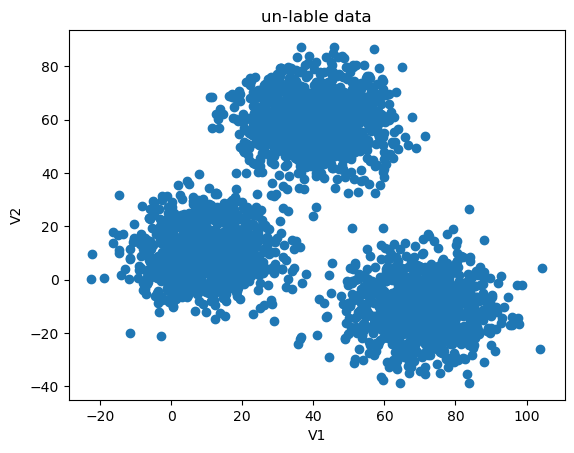

In [11]:
#数据可视化
fig1 = plt.figure()
plt.scatter(X.loc[:, 'V1'], X.loc[:, 'V2'])
plt.title('un-lable data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

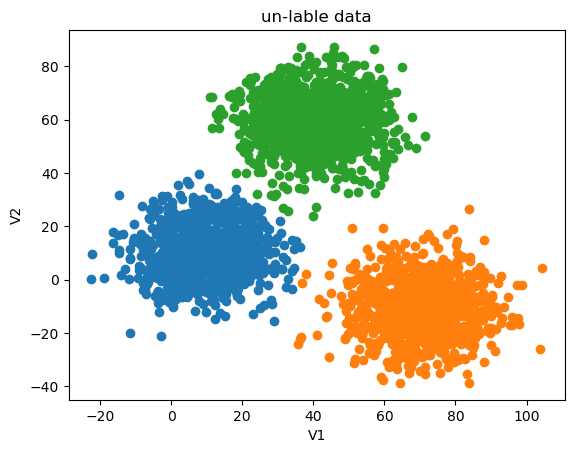

In [12]:
#数据可视化
fig2 = plt.figure()
plt.scatter(X.loc[:, 'V1'][y == 0], X.loc[:, 'V2'][y == 0])
plt.scatter(X.loc[:, 'V1'][y == 1], X.loc[:, 'V2'][y == 1])
plt.scatter(X.loc[:, 'V1'][y == 2], X.loc[:, 'V2'][y == 2])
plt.title('un-lable data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

In [13]:
from sklearn.cluster import KMeans

KM = KMeans(n_clusters=3, random_state=0)
KM.fit(X)

KMeans(n_clusters=3, random_state=0)

In [16]:
centers = KM.cluster_centers_

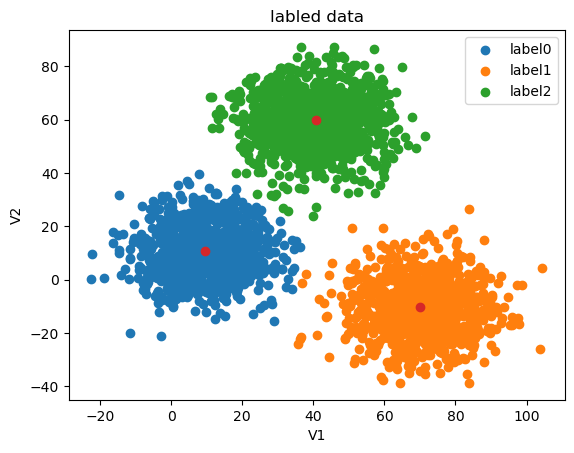

In [17]:
fig3 = plt.figure()
label0 = plt.scatter(X.loc[:, 'V1'][y == 0], X.loc[:, 'V2'][y == 0])
label1 = plt.scatter(X.loc[:, 'V1'][y == 1], X.loc[:, 'V2'][y == 1])
label2 = plt.scatter(X.loc[:, 'V1'][y == 2], X.loc[:, 'V2'][y == 2])

plt.title("labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()

In [18]:
#test data:V1=80,V2=60
y_predict_test = KM.predict([[80, 60]])
y_predict_test

C:\Users\echoc\.conda\envs\mooc37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [19]:
y_predict_knn = KM.predict(X)
print(pd.value_counts(y_predict_knn))

1    1149
0     952
2     899
dtype: int64


In [20]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, y_predict_knn)
accuracy

0.0023333333333333335

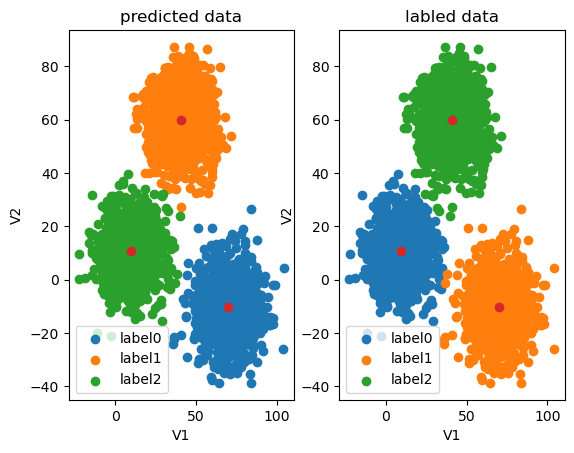

In [21]:
#visualize the data and results
fig4 = plt.subplot(121)
label0 = plt.scatter(X.loc[:, 'V1'][y_predict_knn == 0], X.loc[:, 'V2'][y_predict_knn == 0])
label1 = plt.scatter(X.loc[:, 'V1'][y_predict_knn == 1], X.loc[:, 'V2'][y_predict_knn == 1])
label2 = plt.scatter(X.loc[:, 'V1'][y_predict_knn == 2], X.loc[:, 'V2'][y_predict_knn == 2])

plt.title("predicted data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])

fig5 = plt.subplot(122)
label0 = plt.scatter(X.loc[:, 'V1'][y == 0], X.loc[:, 'V2'][y == 0])
label1 = plt.scatter(X.loc[:, 'V1'][y == 1], X.loc[:, 'V2'][y == 1])
label2 = plt.scatter(X.loc[:, 'V1'][y == 2], X.loc[:, 'V2'][y == 2])

plt.title("labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()

In [23]:
y_corrected = []
for i in y_predict_knn:
    if i == 0:
        y_corrected.append(1)
    elif i == 1:
        y_corrected.append(2)
    else:
        y_corrected.append(0)

In [24]:
accuracy_score(y, y_corrected)

0.997

In [26]:
y_corrected = np.array(y_corrected)

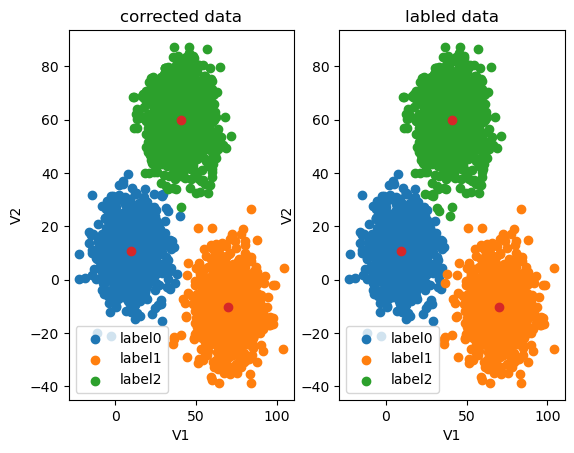

In [27]:
fig6 = plt.subplot(121)
label0 = plt.scatter(X.loc[:, 'V1'][y_corrected == 0], X.loc[:, 'V2'][y_corrected == 0])
label1 = plt.scatter(X.loc[:, 'V1'][y_corrected == 1], X.loc[:, 'V2'][y_corrected == 1])
label2 = plt.scatter(X.loc[:, 'V1'][y_corrected == 2], X.loc[:, 'V2'][y_corrected == 2])

plt.title("corrected data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])

fig7 = plt.subplot(122)
label0 = plt.scatter(X.loc[:, 'V1'][y == 0], X.loc[:, 'V2'][y == 0])
label1 = plt.scatter(X.loc[:, 'V1'][y == 1], X.loc[:, 'V2'][y == 1])
label2 = plt.scatter(X.loc[:, 'V1'][y == 2], X.loc[:, 'V2'][y == 2])

plt.title("labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()

## KNN,Meanshift算法

In [28]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [29]:
KNN.predict([[80,60]])

C:\Users\echoc\.conda\envs\mooc37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([2], dtype=int64)

In [32]:
y_predict_knn = KNN.predict(X)
accuracy_score(y, y_predict_knn)

1.0

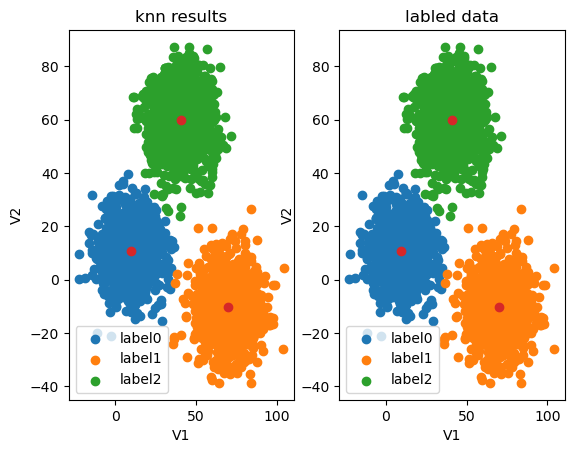

In [33]:
fig6 = plt.subplot(121)
label0 = plt.scatter(X.loc[:,'V1'][y_predict_knn==0],X.loc[:,'V2'][y_predict_knn==0])
label1 = plt.scatter(X.loc[:,'V1'][y_predict_knn==1],X.loc[:,'V2'][y_predict_knn==1])
label2 = plt.scatter(X.loc[:,'V1'][y_predict_knn==2],X.loc[:,'V2'][y_predict_knn==2])

plt.title("knn results")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])

fig7 = plt.subplot(122)
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title("labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [34]:
from sklearn.cluster import MeanShift,estimate_bandwidth

bw = estimate_bandwidth(X,n_samples=500)
print(bw)

MS = MeanShift(bandwidth=bw)
MS.fit(X)

30.84663454820215


MeanShift(bandwidth=30.84663454820215)

In [35]:
y_predict_ms = MS.predict(X)

accuracy_score(y,y_predict_ms)

0.31966666666666665

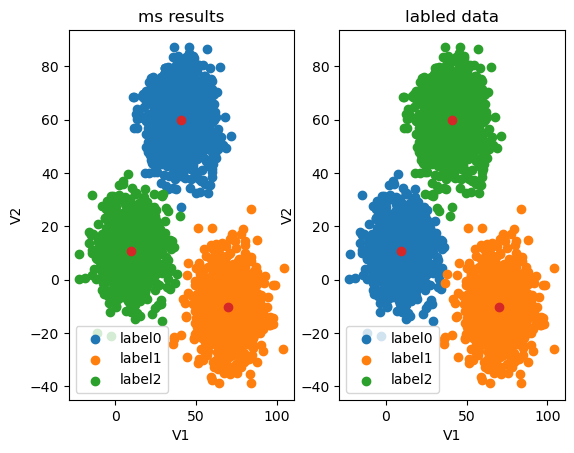

In [36]:
fig6 = plt.subplot(121)
label0 = plt.scatter(X.loc[:,'V1'][y_predict_ms==0],X.loc[:,'V2'][y_predict_ms==0])
label1 = plt.scatter(X.loc[:,'V1'][y_predict_ms==1],X.loc[:,'V2'][y_predict_ms==1])
label2 = plt.scatter(X.loc[:,'V1'][y_predict_ms==2],X.loc[:,'V2'][y_predict_ms==2])

plt.title("ms results")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])

fig7 = plt.subplot(122)
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title("labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [37]:
#correct the results
y_corrected_ms = []
for i in y_predict_ms:
    if i==0:
        y_corrected_ms.append(2)
    elif i==1:
        y_corrected_ms.append(1)
    else:
        y_corrected_ms.append(0)
print(pd.value_counts(y_corrected_ms),pd.value_counts(y))

2    1149
1     952
0     899
dtype: int64 2    1156
1     954
0     890
Name: labels, dtype: int64


In [38]:
#convert the results to numpy array
y_corrected_ms = np.array(y_corrected_ms)
print(type(y_corrected_ms))

<class 'numpy.ndarray'>


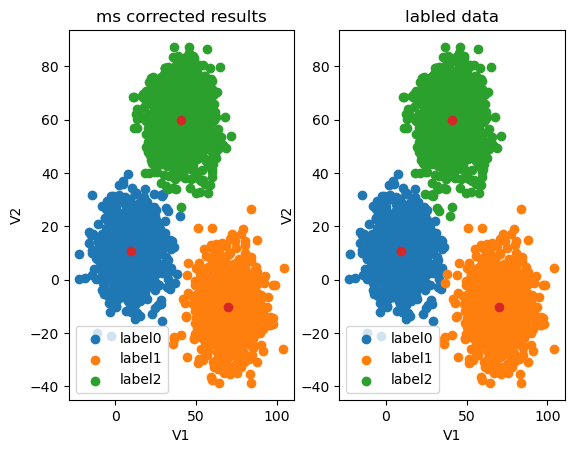

In [39]:
fig6 = plt.subplot(121)
label0 = plt.scatter(X.loc[:,'V1'][y_corrected_ms==0],X.loc[:,'V2'][y_corrected_ms==0])
label1 = plt.scatter(X.loc[:,'V1'][y_corrected_ms==1],X.loc[:,'V2'][y_corrected_ms==1])
label2 = plt.scatter(X.loc[:,'V1'][y_corrected_ms==2],X.loc[:,'V2'][y_corrected_ms==2])

plt.title("ms corrected results")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])

fig7 = plt.subplot(122)
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title("labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [40]:
accuracy_score(y,y_corrected_ms)

0.997